<a href="https://colab.research.google.com/github/Dianamarlen12/geiser/blob/main/geiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nombre del alumno: Diana Marlen Meneses Alegria
* Matricula: 1718110399
* Grupo: IDGS91
* Fecha de entrega: 10 de diciembre del 2021

# Problema 
Se tiene un conjunto de datos de erupciones de géiseres, y se desea clasificar para su estudio.

Los datos que se tienen son:
* TimeEruption = tiempo de erupcion en minutos.
* TimeWaiting = tiempo de espera para la siguiente erupcion.

In [10]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib 
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#import tensorflow as tf

# Versiones

In [11]:
print("Pandas {}".format(pd.__version__))
print("Numpy {}".format(np.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Sklearn {}".format(sklearn.__version__))
#print("Tensorflow {}".format(tf.__version__))

Pandas 1.1.5
Numpy 1.19.5
Matplotlib 3.2.2
Sklearn 1.0.1


In [5]:
#!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.8
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3


# Cagar el dataset 

In [13]:
df = pd.read_csv("geisers.csv")

# Información del dataframe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [16]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [17]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# Graficar el dataframe

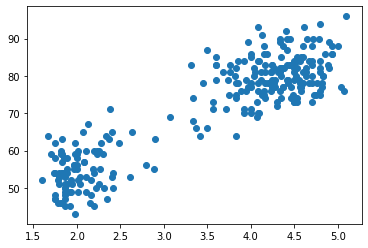

In [19]:
plt.scatter(df['TimeEruption'], df['TimeWaiting'])
plt.show()

# Datos aleatorios

In [65]:
TimeEruption = np.random.randint(100,size=100)
TimeWaiting = np.random.randint(100,size=100)

data = {
    'TimeEruption' : TimeEruption,
    'TimeWaiting' : TimeWaiting
}
df = pd.DataFrame(data)

# Configuarar modelo

In [66]:
model = KMeans(n_clusters=2,max_iter=100)

# Estandarizar los datos

In [67]:
df = StandardScaler().fit_transform(df)

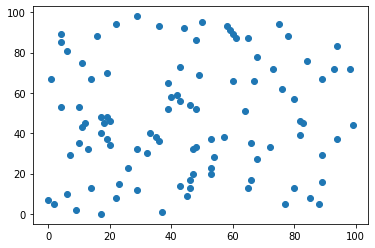

In [68]:
plt.scatter(df_s['TimeEruption'],df_s['TimeWaiting'])     
plt.show()

# Graficar valores estandarizados 

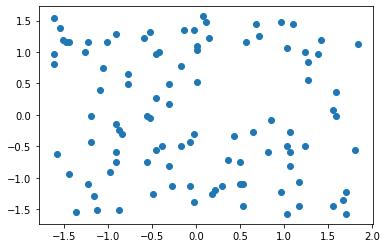

In [69]:
plt.scatter(df[:,0], df[:,1])
plt.show()

# Entrenamiento

In [70]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

# Centriodes

In [71]:
centroids = model.cluster_centers_
centroids

array([[-0.24681368,  0.93912028],
       [ 0.21887251, -0.83280478]])

# Ver las etiquetas

In [72]:
model.labels_

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int32)

# Graficar los centroides

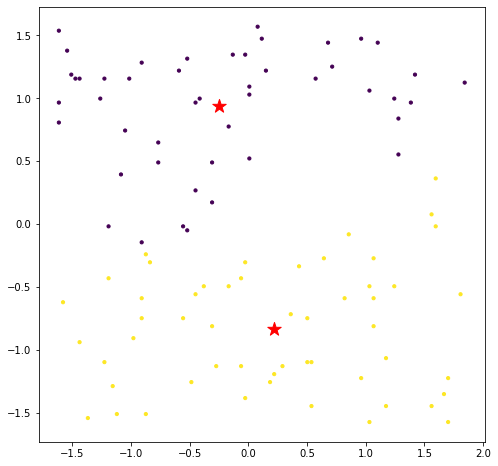

In [73]:
plt.figure(figsize=(8,8))
plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker="*",s=200,label="centroides")
plt.show()

# Predicciones

In [74]:
new_label = model.predict([(-1.0,0.0)])
new_label[0]

0

# Seleccionar el número de clusters

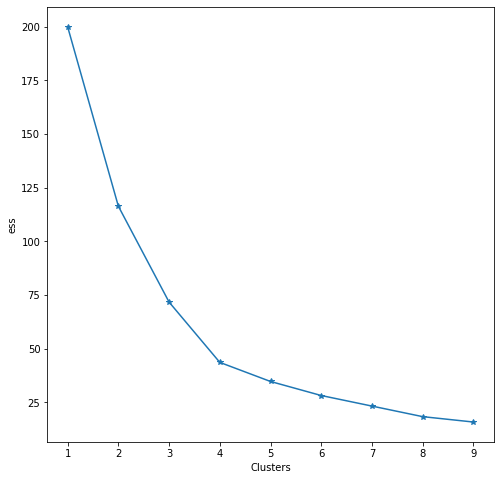

In [75]:
ess = [] #suma de las distancia al cuadrado
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(list_k,ess,"-*")
plt.xlabel("Clusters")
plt.ylabel("ess")
plt.show()

# Gráficar con distintos clusters

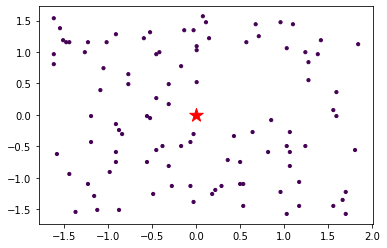

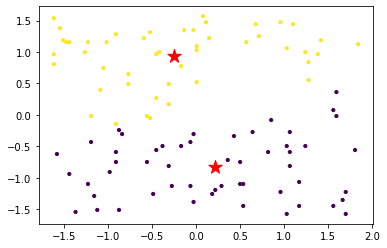

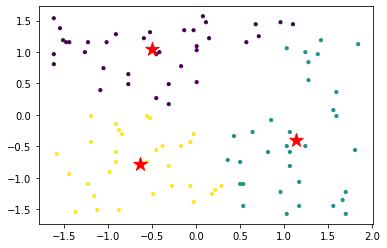

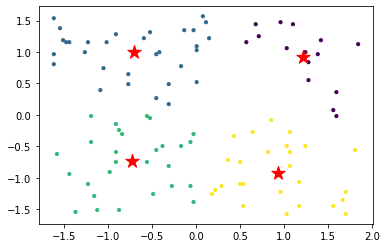

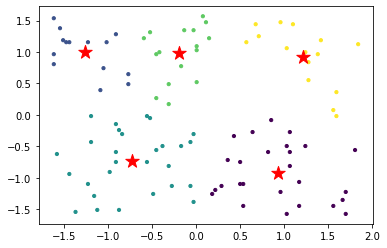

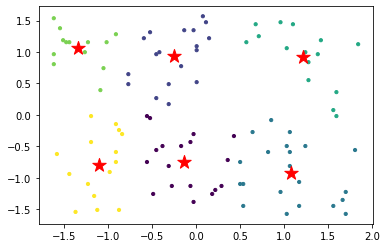

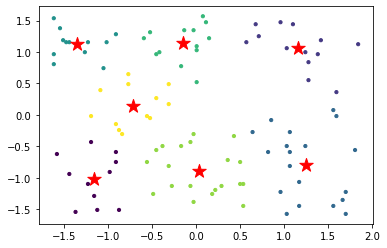

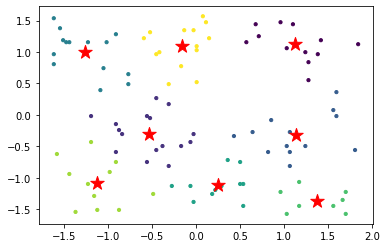

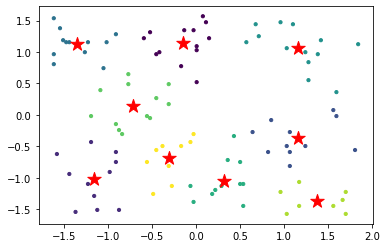

In [76]:
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  centroids = model.cluster_centers_
  plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
  plt.scatter(centroids[:,0],centroids[:,1],c='red',marker="*",s=200,label="centroides")
  plt.show()


# Conclusión

La práctica estuvo muy interesante ya que aprendimos el proceso de lenguaje no supervisado, estos métodos son utiles ya que se basan en el proceso de entrenamiento de los datos pero no tienen que tener etiquetas o clases que ya esten definidas y también solo se permiten datos númericos. Este proceso es interesante ya que esta dedicado a las tareas de agrupamiento, que son llamadas clustering (por eso importamos sklearn.cluster) el objetivo que tiene es encontrar grupos similares en el conjunto de datos que estamos analizando.



